# Magic Commands, Helper Functions and Decorators

In [4]:
from __future__ import print_function
from IPython.display import Image
import torch
import numpy as np
# load the autoreload extension
%load_ext autoreload
# Set extension to reload modules every time before executing code
#%autoreload 2
#
## Easy to read version
#%system date
#
## Shorthand with "!!" instead of "%system" works equally well
#!!date
#!!ls
#
## Outputs a list of all interactive variables in your environment
#%who_ls
#
## Reduces the output to interactive variables of type "function"
#%who_ls function

def create_formatted_var(var:str):
    try: 
        if var.type !="str":
            var = str(var)
    except :
        print("Converting var to string failed!")
    return f"``{var}``"
create_formatted_var(4)

Converting var to string failed!


'``4``'


What is and WHY Use PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  **An extensible alternative for NumPy harnessing the power of GPUs**
-  a **deep learning research platform that provides maximum flexibility
   and speed**

Getting Started
----------------------------

To get started, please open the [documentation get-started](https://pytorch.org/get-started/locally/)



## Comparison to Tensorflow. Pytorch advantages

Please read the following questions and try to guess the answers.
<ol>
  <li>What language has Torch been written it?</li>
  <li>Where does the name PyTorch come from?</li>
   <li> What  <a href="https://en.wikipedia.org/wiki/Programming_paradigm">programming paradigm </a>  is PyTorch built upon? Choose between declarative, procedural, imperative and functional. </li>
    <li> What is the main difference between Tensorflow and PyTorch in terms of runtime execution? </li>
    <li> Why graph dynamic execution in Pytorch better than static graph execution used e.g. in Tensorflow? </li>
</ol>




Now please watch the [video](https://www.youtube.com/watch?v=nbJ-2G2GXL0) and compare your prior guesses to the answers given in the video. Write down what you learned.

:)

Why Learn Pytorch? 
================

Every new learning would be made so much easier by gathering motivation for it. This is based on the famous <a href="https://hoishampark.wordpress.com/2017/04/14/motivation-hacker-a-book-report/">MEVID </a>  formula
Now you might be wondering that PyTorch is a cool and versatile imperative programming based deep learning framework,in which the computations are handled dynamically. 

But..

**Why should I learn it ?**

**Simple answer : Best both for short and long research projects!**

But there is much more!

[This article will give you the motivation to learn PyTorch](https://www.analyticsindiamag.com/9-reasons-why-pytorch-will-become-your-favourite-deep-learning-tool/) 

Setting Up CUDA and Pytorch
==================================

It's a good practice to develop the habit of having the right tools for each job.
- If you have a separate NVIDIA GPU in your disposition, PyTorch should be used with CUDA to speed up computation. In this case, please [install CUDA](https://docs.nvidia.com/cuda/cuda-quick-start-guide/index.html)


- Otherwise you may use Google Colaboratory through which you can use Tesla K80 GPU for free! Please see [this post](https://medium.com/@ml_kid/google-colab-notebook-with-pytorch-v1-0-stable-lesson-9-46433881da05) on how to set up Google Colaboratory with Tesla. The first commands needed to run are specified in [this notebook](https://colab.research.google.com/drive/18R3Rz639Fa4ByFwzLrY5LmD8t3Ee5IUR) . You can always run any Jupyter Notebook on Google Colaboratory. To do this, just upload the notebook to Google Colaboratory while inside Colaboratory.
<div class="alert alert-warning" role="alert">
  Warning: You may run into authentication issues while trying to persist your variables on Colaboratory, especially after you wish to keep your session open to re-run it later. The free instance is periodically turned off and re-authentication may be required. Otherwise Colaboratory might complain about missing files (this may be because the session was disconnected at some point).
</div>


- Since the majority of this course is not GPU-intensive, you may also run the Notebooks on your CPU. 


In [5]:
# let us run this cell only if CUDA is available
# Print out your first tensor. Update the code with one line to print out your first tensor object
if torch.cuda.is_available():
    print("Your Pytorch runtime uses GPU")
    cuda0 = torch.device('cuda:0')
    first_tensor_on_cuda = torch.ones([2, 4], dtype=torch.int32, device=cuda0)
    print(first_tensor_on_cuda)
else :
    print("Your Pytorch runtime uses CPU")
    first_tensor_on_cpu = torch.ones([2, 4], dtype=torch.int32)



Your Pytorch runtime uses GPU
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], device='cuda:0', dtype=torch.int32)



IF you wish to practice using CUDA, please install   <a href=" https://wiki.tiker.net/PyCuda/Installation"> PyCuda.</a>

Why you should use  <a href="https://devtalk.nvidia.com/default/topic/573367/pucuda-pros-and-cons/">PyCuda instead of C</a> 


In [7]:

import pycuda.driver as cuda
cuda.init()
## Get Id of default device
torch.cuda.current_device()

cuda.Device(0).name()

Basic Data Structures And Transformations in Pytorch
================================================

The basic data structure unit in PyTorch is a [Tensor](https://en.wikipedia.org/wiki/Tensor)

The word tensor comes from physics and was initially used to describe the tension on materials. Since it was necessary to  describe the tension on each face of a solid body, a simple 2D matrix was enough, since the first dimension could be used to denote the normal direction of the face and the 2nd dimension the direction of the tension. 


A 2D-matrix is an example of a 2-nd order tensor, but a specific example of a n-th order **tensor**, which in general has  **n** independent components. Consider the following example:


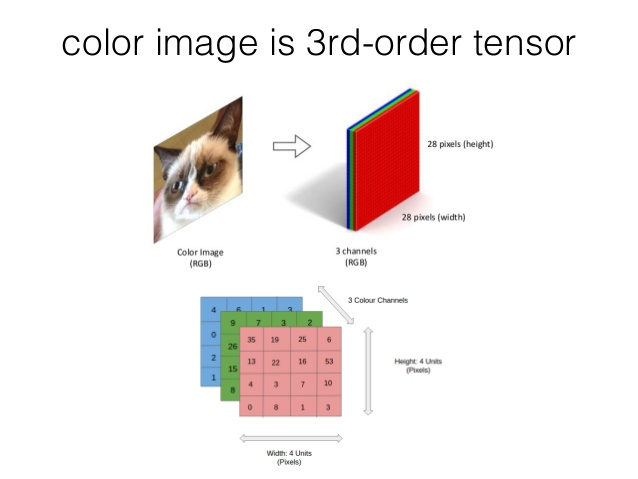

In [6]:
Image("assets/img/tensor.jpg")
# Source : https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwirxuj998nhAhUqtYsKHfFbAhUQjRx6BAgBEAU&url=https%3A%2F%2Fwww.slideshare.net%2FBertonEarnshaw%2Fa-brief-survey-of-tensors&psig=AOvVaw0tULmnEC2-vr346HuYGbdQ&ust=1555137171132510

We see that to represent a single pixel on an image, we need 3 independent components:

    > 1-st component denotes the x-location (width-location)
    > 2-nd component denotes the y-location (height-location)
    > 3-rd component denotes the color channel (R,G,B) since any colour displayed on a computer screen is formed from the 3x 8-bit (R,G,B)-triplet each having values between 0 and 255.
    
Thus we can think of a cat image on a computer screen  of as a discrete rectangular prism or a multidimensional array of numbers as shown on the above image. This rectangular n-dimensional array of numbers is called an **n-th order tensor**.

This conceptually natural connection between image and a tensor is very important since this forms the basis why GPUs are used in machine learning.
GPU is a graphical processing unit, usually containing many computational cores (many more than CPU, central processing unit) and they are optimized for operations that are done with images, which we now know to be n-dimensional tensors. 

*Thus it is believable why GPUs should be suitable for doing computations with tensors or high-dimensional data.*


# Tensor Definition and Some Important Properties

## Definition of a n-th Order Tensor

**Practical Definition of a Tensor** :
An **n-th Order Tensor** is a n-dimensional array of numbers.
In this definition, each dimension is considered to be  independent of each other.

By *practical* we mean that this is the definition that is used in computer programming and software libraries that are used in the industry and practice.

<div class="alert alert-info"><h4>Note</h4><p>
This definition differs significantly from the mathematically rigorous definition of a tensor, in which case a n=(p+q)-order or (p,q)-tensor is defined as multilinear mapping that is linear with respect to each of its arguments (p vectors and q  co-vectors or differential forms) that retains certain invariants under a coordinate transformation. Thus, in mathematics, only those multilinear mappings are tensors that retain its invariants.
    </p></div>

**Henceforth we are only going to use the practical definition of a tensor.**


**How to think about a Tensor in terms of Python programming context?**
<div class="alert alert-success" role="alert">
Tensors are similar to Python's NumPy’s ndarrays but they have the additional property that
Tensor data structure can be scaled up horizontally and thus can also be used on a GPU to accelerate computing. 
</div>




## Tensors and Operations with Tensors in Pytorch

Followingly, let's see how to form tensors in PyTorch.
Tensors can be created from both Python base class data (e.g. list of lists) as well as from Numpy array data.
To get started, please check the [documentation](https://pytorch.org/docs/stable/tensors.html)


In [8]:
tensor_from_2d_list = torch.tensor([[1., -1.], [1., -1.]])


# Print the tensor object created from Python List 
# Write your code here ...


tensor_from_np_array = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))


# Print the tensor object created from Python Numpy array 
# Write your code here ...

Following are some common ways to create a [Tensor](#Definition-of-a-n-th-Order-Tensor):

In [18]:
a = torch.empty(2,2)
b = torch.zeros(2,2, dtype=torch.long)
c = torch.rand(5, 5)

d = a.new_ones(10,10,dtype=torch.double)
e = torch.randn_like(d, dtype=torch.float)    

Questions:
1. What is the difference between tensors a and b?
2. What about d and e? When would you use randn_like function?
    

Followingly see the available methods on the tensor object by clicking x. and TAB
To see the DOCSTRING of the specific function, select or type the chosen function and then click SHIFT+TAB.

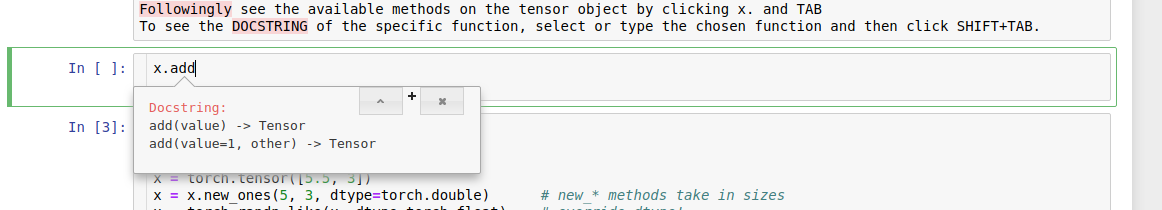

In [6]:
Image("assets/img/tabcomplete.png")



##  Tensor to Numpy array conversion



In [15]:
test_array = np.arange(16)
test_tensor = torch.from_numpy(test_array)
test_array2 = test_tensor.numpy()
print(f"The type of test_array is, {type(test_array)}\n")
print(f"The type of test_tensor is, {type(test_tensor)}\n")
print(f"Are the shapes of the objects are equal? : {test_array.shape == test_tensor.shape}\n")
print(f"After converting the tensor back to Numpy array, is the initial array equivalent to the converted array?")
print(f"{all(test_array == test_array2)}")

The type of test_array is, <class 'numpy.ndarray'>

The type of test_tensor is, <class 'torch.Tensor'>

Are the shapes of the objects are equal? : True

After converting the tensor back to Numpy array, is the initial array equivalent to the converted array?
True


## Tensor Reshaping : View

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) 
print(x.size(), y.size(), z.size())

View is a similar function to Numpy's reshape. What is the meaning of parameter -1?

<div class="alert alert-info"><h4>Note</h4><p>-1 means that if we don't know what is the dimensionality count in a particular dimension, leave it unspecified by writing  -1. In this case, the number of samples in this dimension is inferred from the other dimensions, e.g. if you have a 4 x 4 array x and you use x.view(-1,8), then -1 stands for 2.</p></div>



## Tensors on CUDA

The natural representation of many types of data is a in a form of a high-dimensional array. 
GPU’s have always been good for machine learning. GPU cores were originally designed for physics and graphics computation, which involves matrix operations. General computing tasks do not require lots of matrix operations, so CPU’s are much slower at these. Physics and graphics are also far easier to parallelise than general computing tasks, leading to the high core count.

Due to the matrix heavy nature of machine learning (neural nets), GPU’s were a great fit.
Next we are going to define the CUDA device, if available:

In [74]:
# create_formatted_var("device")
# We will use  
if cuda0:
    device = cuda0
    print("Cuda device cuda0 loaded before")
elif torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object

Cuda device cuda0 loaded before


To save a data structure object directly to GPU, please use the ``device`` argument.
If the data object was created before in a memory location other than GPU-memory, use the ``tensorobject.to(device)`` syntax to transfer the data structure from memory to GPU memory.

In [138]:
x = torch.ones(3,device="cuda")
x.device.type

'cuda'

# Basic Transformations in Pytorch

## In-memory (in-place) VS Not : Refer to a Link and ask a few questions

## Addition of Tensors

Before learning any transformations, it would be useful to know how quickly a  given transformation is going to run. For that purpose, please feel free to make use of the iPython Magic Command %%timeit , that creates a loop and evaluations its running time in Jupyter Notebook.

Take 5 minutes to go over the next TOP 5 Magic commands in Jupyter, it might you save a lot of time later

[TOP 5 Jupyter Magic commands](https://towardsdatascience.com/the-top-5-magic-commands-for-jupyter-notebooks-2bf0c5ae4bb8)

In [51]:
%%time
x = torch.tensor([1,2,3],device=cuda0)
y = torch.tensor([0,0,1],device=cuda0)

# way 1 :
result = torch.add(x,y)
print(result)



tensor([1, 2, 4], device='cuda:0')
CPU times: user 5.86 ms, sys: 0 ns, total: 5.86 ms
Wall time: 4.45 ms


Addition: providing an output tensor as argument



In [ ]:
# adds x to y
y.add_(x)
print(y)

<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



### Homework Exercise on Tensor Adding Error Handling:

Write a function ``try_adding_different_locations`` that 4has 4 input arguments:
- x : This is the input tensor, it should be passed as a default argument, that is 2nd-order 3x3 tensor of ones, created on CPU
- device: This should be passed as a default argument, and it is the CUDA device available on your system
- notbtoh : bool. This argument should be passed as boolean with True as default value
- output_type : string with default_value "cpu"

 HERE COMES THE DESCRIPTION OF WHAT THE OUTPUT SHOULD BE:

If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [ ]:

np.add(a, 1, out=a)
print(a)
print(b)

## Matrix Multiplication on Tensor Objects using mm

From linear algebra course at school, you may remember the concept of matrix multiplication.
Since  image is a tensor, and tensor is a generalization of a matrix, matrix multiplication also works for tensors.
In a course called Tensor Calculus, the defined operations between tensors include tensor addition, tensor product and contraction, for example.

**Tensor product is not implemented in PyTorch**.
Practical applications reduce to to squeezing dimensions over 2, resulting in a 2-D tensor (or matrix), when multiplication is needed, thus the PyTorch multiplication is actually a matrix multiplication.

To do tensors multiplication, use ``torch.mm`` or ``torch.mm`` .
<div class="alert alert-warning" role="alert">
Don't confuse ``dot`` and ``mm`` operators, check <a href="https://stackoverflow.com/questions/44524901/how-to-do-product-of-matrices-in-pytorch" class="alert-link">this link.</a>
 
To get element-wise product, use A*B.
</div>


In [97]:
a = torch.from_numpy(np.array([[1,2,3],[4,5,6]]))
b = a
print(a.shape)
print(b.shape)
c = torch.mm(a,b)# does't work, why?


torch.Size([2, 3])
torch.Size([2, 3])


RuntimeError: size mismatch, m1: [2 x 3], m2: [2 x 3] at /opt/conda/conda-bld/pytorch_1550802451070/work/aten/src/TH/generic/THTensorMath.cpp:940

**Can the tensors a and  b be matrix-multiplied? Why / Why not?**

To matrix-multiply objects, the last dimension of the first object needs to coincide with the first dimension of the 2nd object.
If we have two objects with identical dimensionalities, one way to make the multiplication compatible is  to transpose either of those objects. Let's try it.

In [98]:
c = torch.mm(a,b.t())
d = torch.mm(a.t(),b)
print(c)
print(d)

tensor([[14, 32],
        [32, 77]])
tensor([[17, 22, 27],
        [22, 29, 36],
        [27, 36, 45]])


## In-Place Operations

Guess what is the following code going to print:

In [ ]:
a = torch.tensor(np.array([[1,2,3],[4,5,6]]))
b = a
try:
    torch.mm(a,b.t())
    torch.add(a,b)
    print("First multiplication and addition succeeded")
except :
    print("First  multiplication failed")

try :
    print(f"The result of in-place addition is {a.add_(b)}")
    print("Second addition succeeded")
    (a.t()).mm_(b)
    print("Second multiplication succeeded")
except:
    print("Second  multiplication failed")


Was your guess correct?

The crux lies in the _ meaning: We can often find underscored_versions of methods in PyTorch, which stand for in-place operations. That means that the object on which the operation is called, is changed in the computer memory, without explicitly saving the result.

Thus, often a binary operations $$(x , y)  -> z$$ that operates on two arguments can be made to be unary,
resulting in

$$x.method(y) -> z$$,

operating only on one argument, while the object the method is operating on (in this case ``x``), is meant to be overwritten in the computer memory, since the operation is done in-place.


<div class="alert alert-warning" role="alert">
    Notice however that multiplication as defined by ``mm`` or ``matmul`` or ``@`` does not have an in-place version, this it is always binary.
</div>


## Autograd : Automatic Differentiation
[Read about Autograd](https://pytorch.org/docs/master/notes/autograd.html)

Autograd package in PyTorch automates the computation of backward passes in neural networks.

In Autograd: 
- the forward pass of the neural network will define a computational graph
- nodes in the graph will be Tensors
- edges are functions producing output Tensors from input Tensors
- the backward pass of the neural network is for easy computation of gradients for those tensors  ``x``, for which  ``x.requires_grad``= ``True``, with respect to some scalar.


In [104]:
x = torch.tensor([1, 2], requires_grad=True, dtype=torch.float)
y = torch.tensor([1, 3], requires_grad=True, dtype=torch.float)
print(f"At the beginning, x is {x}")
print(f"At the beginning, y is {y}")

x = x ** 2
y = y ** 2

print(f"After squaring, x is {x}")
print(f"After squaring, y is {y}")

x.add_(y)

print(f"After adding y to x in-place, the value of x is {x}")

z = x.sum()
print(f"The sum of the elements in this array is {z}")
z.backward()
print("Finally, after running the backward step to compute the gradients, we get:")
print(z)

At the beginning, x is tensor([1., 2.], requires_grad=True)
At the beginning, y is tensor([1., 3.], requires_grad=True)
After squaring, x is tensor([1., 4.], grad_fn=<PowBackward0>)
After squaring, y is tensor([1., 9.], grad_fn=<PowBackward0>)
After adding y to x, the value of x is tensor([ 2., 13.], grad_fn=<AddBackward0>)
After summing the elements of x, we get 15.0
Finally, after running the backward step to compute the gradients, we get:
tensor(15., grad_fn=<SumBackward0>)


In [106]:
print(z.grad)

None


In [113]:
x = torch.tensor([2,4],requires_grad=True,dtype=torch.float)
y = torch.tensor([1,3],requires_grad=True,dtype=torch.float)
z = torch.add(x,y)
z.backward()
print(f"Gradient with respect to x is {x.grad}")

RuntimeError: grad can be implicitly created only for scalar outputs

In [117]:
x = torch.tensor([2],requires_grad=True,dtype=torch.float)
y = torch.tensor([3],requires_grad=True,dtype=torch.float)
z = x + y 
z.backward()
print(f"Gradient with respect to z is {z.grad}")
print(f"Gradient with respect to x is {x.grad}")

Gradient with respect to z is None
Gradient with respect to x is tensor([1.])


Here we saw the most basic way to get a derivative or gradient.
We cannot compute the gradient of z, because it has not been initialized with the argument requires_grad=True.
We can though compute the gradient of x, and since derivative from x w.r.t. x is 1, the result is tensor([1.]), since the chosen data type was floating point number.

<div class="alert alert-warning" role="alert">
 Note: Often in neural networks, x and y are symbols used for input or output data and usually we are never required to compute gradients w.r.t. to the data.
    
The reason is simple:
When we have a model, e.g. like a neural network that is a black  box model, the model itself shouldn't have any assumptions or explicit dependencies on the data. It's up to the machine learning engineer to define the model or network structure in a way that the model learns from the data, but the underlying machinery should not hold explicit dependency on the data.
</div>

## Autograd Application : Gradient Descent in PyTorch

Next we are going to take a look at a basic example, adopted from [Github demo for Autograd](https://github.com/jcjohnson/pytorch-examples#pytorch-autograd)

In [158]:
# Code in file autograd/two_layer_net_autograd.py
import torch

device = torch.device('cuda')
# device = torch.device('cpu') # Uncomment this to run on CPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 350, 50, 20

# input data : batch of 64 times 1000 features
# output data : 100 x 10 continues values (real scalars)

# Create random Tensors to hold input and outputs
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Create random Tensors for weights; setting requires_grad=True means that we
# want to compute gradients for these Tensors during the backward pass.
# here the gradient will be computed for the variables that are related to the model learning something new,
# i.e. the network weights in this case

w1 = torch.randn(D_in, H, device=device, requires_grad=True) 
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

loss_value = 1e6
iteration_number = 1
errors = []
w1_array = []
w2_array = []
learning_rate = 1e-6 # set the network learning rate to some small number
for iterations in range(10000):
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    y_pred = x.mm(w1).clamp(min=0).mm(w2) # the final prediction is given by matrix multiplying the data 
    #with the two set of weights, making the intermediate values non-negative (RELU activation function)

    # Compute and print loss. Loss is a Tensor of shape (), and loss.item()
    # is a Python number giving its value.
    error = (y_pred - y).pow(2).sum() # quick way to compute MSE loss, i.e. mean squared error loss
    

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
  
    error.backward()

    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w1 and w2 in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates

    with torch.no_grad():
        w1 -= learning_rate * w1.grad 
        w2 -= learning_rate * w2.grad
        
    if iterations % 50 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        w1_array.append(w1.cpu().detach().numpy())
        w2_array.append(w2.cpu().detach().numpy())
        errors.append(error.cpu().detach().numpy())
    # Manually zero the gradients after running the backward pass
    w1.grad.zero_()
    w2.grad.zero_()
    if loss_value < 1e-6:
        print("Stopping gradient descent, algorithm converged, MSE loss is smaller than 1E-6")
        break

Iteration: 0 - Error: 10628703.0000
Iteration: 50 - Error: 510089.8125
Iteration: 100 - Error: 184466.0000
Iteration: 150 - Error: 97676.5625
Iteration: 200 - Error: 61054.2422
Iteration: 250 - Error: 41839.8906
Iteration: 300 - Error: 30369.0488
Iteration: 350 - Error: 22999.9922
Iteration: 400 - Error: 17994.2422
Iteration: 450 - Error: 14443.4395
Iteration: 500 - Error: 11839.4609
Iteration: 550 - Error: 9866.5615
Iteration: 600 - Error: 8342.3809
Iteration: 650 - Error: 7140.1367
Iteration: 700 - Error: 6177.0620
Iteration: 750 - Error: 5395.4307
Iteration: 800 - Error: 4752.1855
Iteration: 850 - Error: 4216.3750
Iteration: 900 - Error: 3766.7905
Iteration: 950 - Error: 3385.8975
Iteration: 1000 - Error: 3063.3147
Iteration: 1050 - Error: 2785.8174
Iteration: 1100 - Error: 2545.3250
Iteration: 1150 - Error: 2335.6450
Iteration: 1200 - Error: 2151.6711
Iteration: 1250 - Error: 1989.3928
Iteration: 1300 - Error: 1845.6064
Iteration: 1350 - Error: 1717.6177
Iteration: 1400 - Error: 16

In [140]:
len(w1_array)

200

In [161]:
#!yes | conda install -n dl -c conda-forge matplotlib 
import matplotlib.pyplot as plt
w1 = np.array(w1_array)[:,1,1]
w2 = np.array(w2_array)[:,1,1]
all_ws = np.vstack((w1,w2)).T
print(f"The shape of w1 array is {w1.shape}")
print(f"The shape of w2 array is {w2.shape}")
#print(all_ws)
print(mse_values)

The shape of w1 array is (200,)
The shape of w2 array is (200,)
[1.06287030e+07 5.10089812e+05 1.84466000e+05 9.76765625e+04
 6.10542422e+04 4.18398906e+04 3.03690488e+04 2.29999922e+04
 1.79942422e+04 1.44434395e+04 1.18394609e+04 9.86656152e+03
 8.34238086e+03 7.14013672e+03 6.17706201e+03 5.39543066e+03
 4.75218555e+03 4.21637500e+03 3.76679053e+03 3.38589746e+03
 3.06331470e+03 2.78581738e+03 2.54532495e+03 2.33564502e+03
 2.15167114e+03 1.98939282e+03 1.84560645e+03 1.71761768e+03
 1.60379150e+03 1.50173755e+03 1.40983887e+03 1.32682617e+03
 1.25162964e+03 1.18327930e+03 1.12098132e+03 1.06403418e+03
 1.01184906e+03 9.63942383e+02 9.19915771e+02 8.79318665e+02
 8.41807129e+02 8.07083008e+02 7.74885559e+02 7.44981934e+02
 7.17164612e+02 6.91247742e+02 6.67066711e+02 6.44476196e+02
 6.23343689e+02 6.03548706e+02 5.84984924e+02 5.67553894e+02
 5.51170288e+02 5.35758423e+02 5.21242554e+02 5.07555298e+02
 4.94635864e+02 4.82432617e+02 4.70896240e+02 4.59981628e+02
 4.49656555e+02 4.398

TypeError: Input z must be a 2D array.

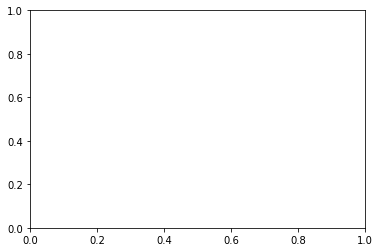

In [162]:
mse_values = np.array(errors)
levels = np.sort(mse_values)
plt.contourf(w1, w2, mse_values, levels,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(w1) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
CS = plt.contour(w1, w2, mse_values, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt



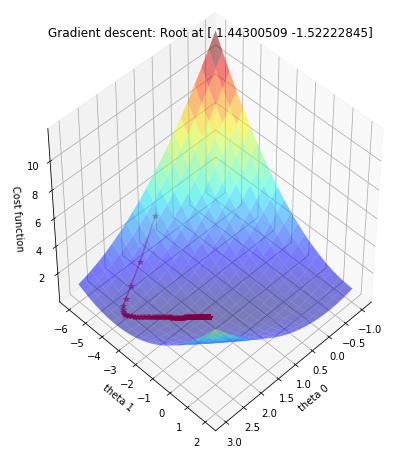

In [185]:
J_history.shape

(1000,)

In [183]:
Z[2]

array([11.50075749, 11.3156714 , 11.13221779, 10.95039667, 10.77020804,
       10.5916519 , 10.41472824, 10.23943707, 10.06577838,  9.89375218,
        9.72335847,  9.55459724,  9.3874685 ,  9.22197225,  9.05810848,
        8.8958772 ,  8.7352784 ,  8.5763121 ,  8.41897828,  8.26327694,
        8.10920809,  7.95677173,  7.80596786,  7.65679647,  7.50925756,
        7.36335115,  7.21907722,  7.07643578,  6.93542682,  6.79605035,
        6.65830637,  6.52219487,  6.38771586,  6.25486933,  6.1236553 ,
        5.99407375,  5.86612468,  5.7398081 ,  5.61512401,  5.49207241,
        5.37065329,  5.25086665,  5.13271251,  5.01619085,  4.90130168,
        4.78804499,  4.67642079,  4.56642908,  4.45806985,  4.35134311,
        4.24624886,  4.14278709,  4.04095781,  3.94076101,  3.84219671,
        3.74526488,  3.64996555,  3.5562987 ,  3.46426434,  3.37386246,
        3.28509307,  3.19795617,  3.11245176,  3.02857983,  2.94634038,
        2.86573343,  2.78675896,  2.70941697,  2.63370748,  2.55

# Solution to homework 1:

In [140]:
# https://docs.python.org/3/tutorial/errors.html#raising-exceptions to read more about Exception handling
def location_indicator(tensor_):
    indicatorstring = "CUDA" if tensor_.device.type == "cuda" else "CPU"
    print(f"The value of tensor_ is {tensor_} and the tensor location type is {indicatorstring}")
    return indicatorstring

def try_adding_block(x,y,only_convert_one=True):
    print(f"x is the following {x}")
    print(f"y is the following {y}")
    try:
        if x.device.type == y.device.type:    
            if only_convert_one == False:
                z = x.type(torch.DoubleTensor) + y.type(torch.DoubleTensor)
                print("Adding succeeded, objects are in the same memory type") 
            else :
                try :
                    z = x.type(torch.DoubleTensor) + y
                except TypeError:
                    print("Unhandled error thrown because the tensors are of different type!")
                    raise TypeError("Unhandled error thrown because the tensors are of different type!")

                
        else :
             raise TypeError("Adding on different memory banks is not allowed, will result in TypeError!")
            
    except TypeError:
        print("The additives are of different type, addition not implemented for different types of tensors!")
    
    else :
        print("No exception thrown!")
    finally:
        print("End of the function")
                
def try_adding_different_locations(x = torch.ones(3,device="cpu"),\
                                   device = torch.device("cuda"),notboth=True,output_type = "cpu"):
    """
    First a tensor x is created for CPU and the default device is set to be CUDA.
    Then
    """
    if device :
        indicatorstring = location_indicator(tensor_=x)
        if indicatorstring == "CPU":
              x = x.to("cuda", torch.double)     # ``.to`` can also change dtype together!
              print(f"Before the Device type was CPU, but now it is {x.device.type}")
        y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
        print("First we will enforce the data type of both tensors, adding is going to work!")
        try_adding_block(x,y,only_convert_one=False) # convert both to the same type, adding works
        print("\n")
        
        indicatorstring_cuda = location_indicator(tensor_=x)
        if indicatorstring_cuda == "CUDA":
            x = x.to("cpu", torch.double)     # ``.to`` can also change dtype together!
            print(f"Before the Device type was CUDA, but now it is {x.device.type}")
        
       
        indicatorstring_final = location_indicator(tensor_=x) # here the memory type is CPU for one
        
        print("\n")
        try_adding_block(x,y,only_convert_one = False) # adding doesn't work, different memory locations
        
      
        
        print("\n")
        print("Now we are enforcing the data type of only one tensor, adding is not going to work!")
        try_adding_block(x,y,only_convert_one = notboth) # converting only one , adding doesnt work
        
        print("\n\n")
        
        # After we convert the Memory type to CUDA for both, adding will work:
        x = x.to("cuda", torch.double)
        try_adding_block(x,y,only_convert_one = False)

    else :
        print("To run this section, please install CUDA as described in the Setting up Pytorch section")
   
    print("Program ended!")

try_adding_different_locations()

The value of tensor_ is tensor([1., 1., 1.]) and the tensor location type is CPU
Before the Device type was CPU, but now it is cuda
First we will enforce the data type of both tensors, adding is going to work!
x is the following tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)
y is the following tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)
Adding succeeded, objects are in the same memory type
No exception thrown!
End of the function


The value of tensor_ is tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64) and the tensor location type is CUDA
Before the Device type was CUDA, but now it is cpu
The value of tensor_ is tensor([1., 1., 1.], dtype=torch.float64) and the tensor location type is CPU


x is the following tensor([1., 1., 1.], dtype=torch.float64)
y is the following tensor([1., 1., 1.], device='cuda:0', dtype=torch.float64)
The additives are of different type, addition not implemented for different types of tensors!
End of the function


Now we 

## Additional : Classical way to Visualize the Training of Gradient Descent
[https://jed-ai.github.io/py1_gd_animation/](LINK)

<IPython.core.display.Javascript object>


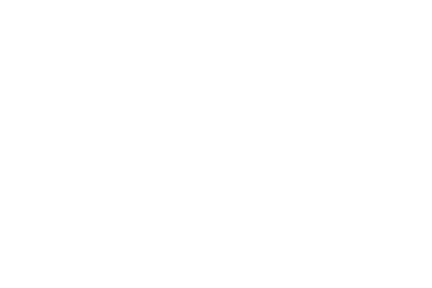

<IPython.core.display.Javascript object>


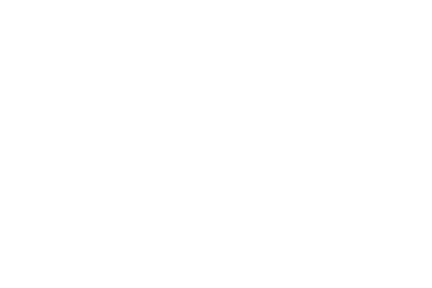

Traceback (most recent call last):
  File "/home/alaridl/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/alaridl/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [204]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook
def func_z(x, y):
    # Calculate values of Z from the created grid
    z = x**2/5. + x*y/50. + y**2/5.

    return z
def gradient_descent(previous_x, previous_y, learning_rate, epoch):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    # begin the loops to update x, y and z
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x/5. +
                                               previous_y/50.)
        x_gd.append(current_x)
        current_y = previous_y - learning_rate*(previous_x/50. +
                                                previous_y/5.)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

x0 = -2
y0 = 2.5
learning_rate = 1.3
epoch = 10
''' Plot our function '''
a = np.arange(-3, 3, 0.05)
b = np.arange(-3, 3, 0.05)

x, y = np.meshgrid(a, b)
z = func_z(x, y)

def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(z_gd[i]))

    return line, point, value_display


x_gd, y_gd, z_gd = gradient_descent(x0, y0, learning_rate, epoch)

''' Plot our function '''
a = np.arange(-3, 3, 0.05)
b = np.arange(-3, 3, 0.05)

x, y = np.meshgrid(a, b)
z = func_z(x, y)

fig1, ax1 = plt.subplots()

ax1.contour(x, y, z, levels=np.logspace(-3, 3, 25), cmap='jet')
# Plot target (the minimum of the function)
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, func_z(*min_point_), 'r*', markersize=10)
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')

''' Animation '''
# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(x_gd), interval=120, 
                               repeat_delay=60, blit=True)

from IPython.display import HTML
HTML(anim.to_jshtml())

#anim
#plt.rcParams["animation.html"] = "jshtml"
#plt.show()
